In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

from sklearn.model_selection import cross_val_predict



In [2]:
#Importing the csv to Jupyter Notebook
training_df = pd.read_csv("../input/diamonds-datamad0120/diamonds_train.csv")
training_df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.78,Premium,F,VS1,61.5,58.0,5.93,5.98,3.66,3446
1,1,0.31,Ideal,D,SI1,60.8,56.0,4.37,4.32,2.64,732
2,2,0.30,Ideal,F,SI1,62.3,54.0,4.30,4.34,2.69,475
3,3,1.04,Ideal,E,VVS2,62.0,58.0,6.54,6.46,4.03,9552
4,4,0.65,Ideal,J,SI1,61.4,55.0,5.58,5.62,3.44,1276


# Cleaning Data

### Columna 'color'

In [3]:
# Replacing all the values in order to get the importance for each value 
color_column = ['J','I','H','G','F','E','D']
for x,y in enumerate(color_column):
    print(f"The value '{y}' now is {x}")
    training_df['color'] = training_df['color'].replace(y, x)

The value 'J' now is 0
The value 'I' now is 1
The value 'H' now is 2
The value 'G' now is 3
The value 'F' now is 4
The value 'E' now is 5
The value 'D' now is 6


### Columna 'clarity'

In [4]:
# clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
clarity_column = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
# Replacing all the values in order to get the importance for each value 
for x,y in enumerate(clarity_column):
    print(f"The value '{y}' now is {x}")
    
    training_df['clarity'] = training_df['clarity'].replace(y, x)

The value 'I1' now is 0
The value 'SI2' now is 1
The value 'SI1' now is 2
The value 'VS2' now is 3
The value 'VS1' now is 4
The value 'VVS2' now is 5
The value 'VVS1' now is 6
The value 'IF' now is 7


### Columna 'cut'

In [5]:
diamonds_new = pd.get_dummies(training_df)
diamonds_new.head()
diamonds_new.shape

(40345, 15)

# Correlation table (Raw Data)

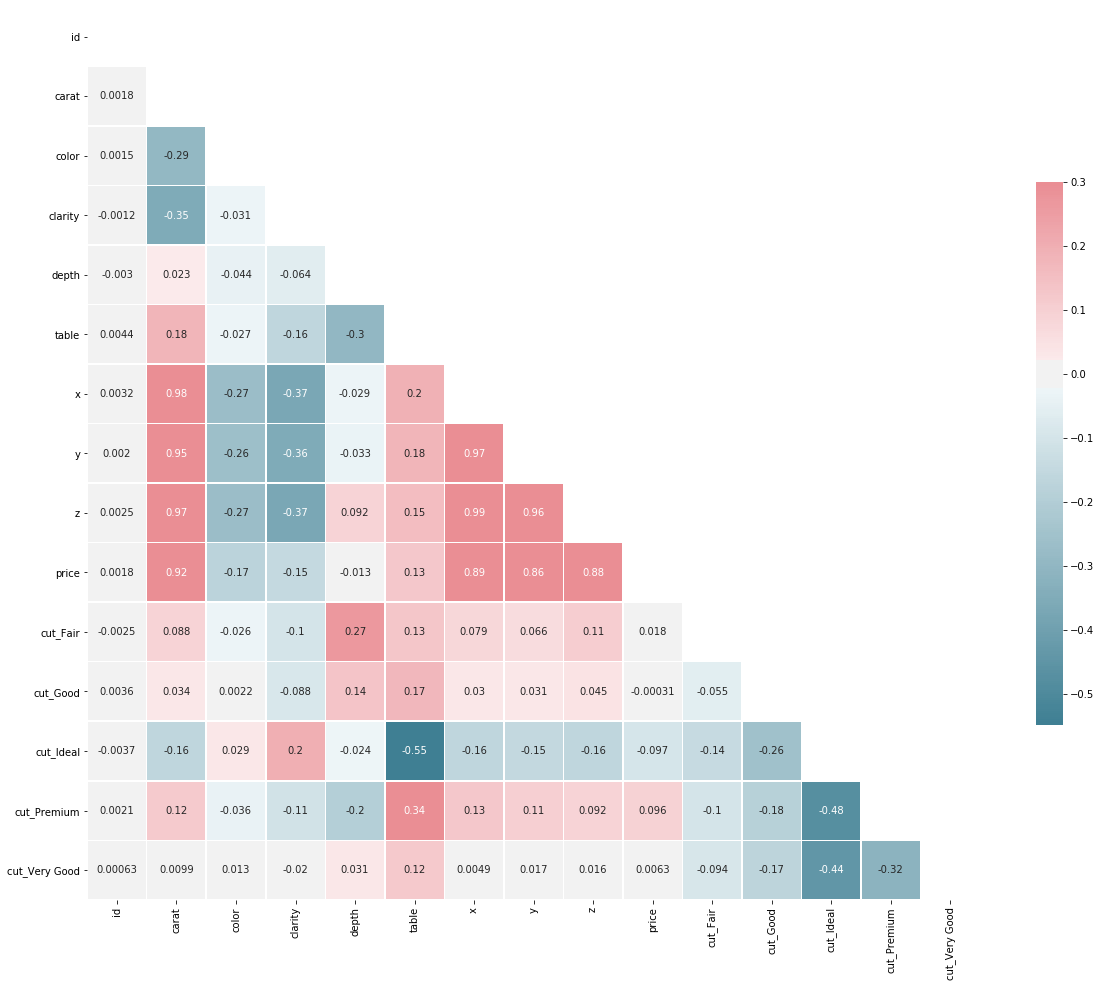

In [6]:
corr = diamonds_new.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20,20))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True);

In [7]:
X = diamonds_new.drop(columns=['id','x','y','z','price'])
y = diamonds_new['price']

In [8]:
X.shape

(40345, 10)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
rf_reg = RandomForestRegressor(n_estimators=300, max_depth=30)

In [11]:
rf_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=30, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [12]:
#variables más importantes
importances = rf_reg.feature_importances_

In [13]:
print(rf_reg.score(X_train, y_train))
print(rf_reg.score(X_test, y_test))

0.9972548865900686
0.9801260284807987


In [14]:
print('*** METRIC SUMMARY ***')
print('MSE', mean_squared_error(y_test, rf_reg.predict(X_test)))
print('RMSE', np.sqrt(mean_squared_error(y_test, rf_reg.predict(X_test))))
print('MSLE', mean_squared_log_error(y_test, rf_reg.predict(X_test)))
print('MAE', mean_absolute_error(y_test, rf_reg.predict(X_test)))
print('R2', r2_score(y_test, rf_reg.predict(X_test)))

*** METRIC SUMMARY ***
MSE 311397.90320040245
RMSE 558.030378384907
MSLE 0.01196436334480979
MAE 285.1262552548331
R2 0.9801260284807987


In [15]:
y_pred = rf_reg.predict(X_test)

# Visualización de los Datos

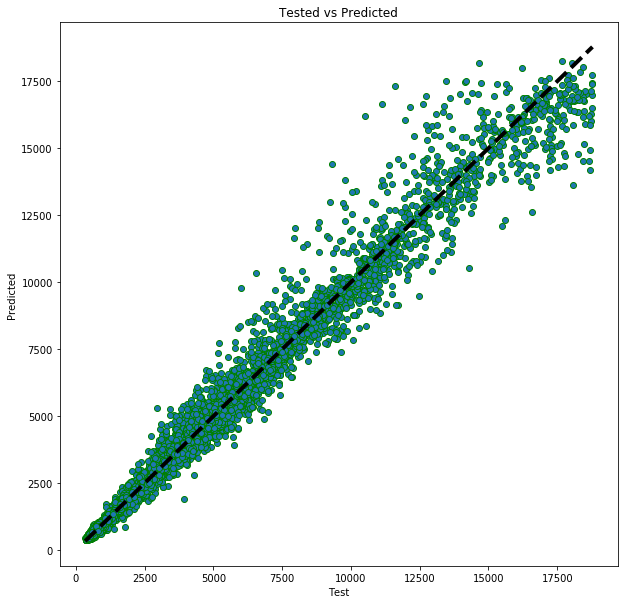

In [16]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(y_test, y_pred, edgecolors='green')
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Test')
ax.set_ylabel('Predicted')
ax.set_title("Tested vs Predicted")
plt.show()

### Repetir los pasos con el 100% de los datos

In [17]:
rf_reg_tot = RandomForestRegressor(n_estimators=300, max_depth=30)

In [18]:
rf_reg_tot.fit(X, y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=30, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

### Importamos el test

In [19]:
#Importing the csv to Jupyter Notebook
test_df = pd.read_csv("../input/diamonds-datamad0120/diamonds_test.csv")
test_df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,1.10,Premium,H,SI2,62.2,58.0,6.69,6.60,4.13
1,1,0.51,Ideal,I,SI1,62.5,57.0,5.07,5.10,3.18
2,2,2.03,Premium,G,SI1,61.9,59.0,8.14,8.09,5.02
3,3,1.21,Premium,F,SI1,60.0,60.0,6.96,6.91,4.16
4,4,0.55,Ideal,F,SI1,61.8,55.0,5.27,5.22,3.24


### Repetir la limpieza que hemos hecho antes de entrenar el modelo

In [20]:
# Replacing all the values in order to get the importance for each value 
color_column = ['J','I','H','G','F','E','D']
for x,y in enumerate(color_column):
    print(f"The value '{y}' now is {x}")
    test_df['color'] = test_df['color'].replace(y, x)

The value 'J' now is 0
The value 'I' now is 1
The value 'H' now is 2
The value 'G' now is 3
The value 'F' now is 4
The value 'E' now is 5
The value 'D' now is 6


In [21]:
# clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
clarity_column = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
# Replacing all the values in order to get the importance for each value 
for x,y in enumerate(clarity_column):
    print(f"The value '{y}' now is {x}")
    
    test_df['clarity'] = test_df['clarity'].replace(y, x)

The value 'I1' now is 0
The value 'SI2' now is 1
The value 'SI1' now is 2
The value 'VS2' now is 3
The value 'VS1' now is 4
The value 'VVS2' now is 5
The value 'VVS1' now is 6
The value 'IF' now is 7


In [22]:
X_test = pd.get_dummies(test_df)
X_test.head()

,id,carat,color,clarity,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good
0,0,1.10,2,1,62.2,58.0,6.69,6.60,4.13,0,0,0,1,0
1,1,0.51,1,2,62.5,57.0,5.07,5.10,3.18,0,0,1,0,0
2,2,2.03,3,2,61.9,59.0,8.14,8.09,5.02,0,0,0,1,0
3,3,1.21,4,2,60.0,60.0,6.96,6.91,4.16,0,0,0,1,0
4,4,0.55,4,2,61.8,55.0,5.27,5.22,3.24,0,0,1,0,0


In [23]:
X_test = X_test.drop(columns=['id', 'x','y','z'])

In [24]:
X_test.columns

Index(['carat', 'color', 'clarity', 'depth', 'table', 'cut_Fair', 'cut_Good',
       'cut_Ideal', 'cut_Premium', 'cut_Very Good'],
      dtype='object')

In [25]:
y_pred = rf_reg_tot.predict(X_test)

In [26]:
last_file = pd.DataFrame({
    'id' : test_df['id'],
    'price' : y_pred
})

# Crear nuevo DataFrame

In [27]:
last_file.to_csv('CSVs/predictions_random_forest_pruebalunes.csv',index = False)

In [28]:
last_file.head()

,id,price
0,0,4643.386722
1,1,1038.154571
2,2,16411.459778
3,3,6677.983667
4,4,1651.436444
